<h1> Les arbres de décision</h1>


Un arbre de décision est un schéma représentant les résultats possibles d'une série de choix interconnectés.

Il permet d'évaluer différentes actions possibles en fonction de leur coût, leur probabilité, de leurs bénéfices. 

Il peut être utilisé  pour générer un algorithme qui détermine le meilleur choix de façon mathématique.

##### CHARGEMENT DES LIBRAIRIES

In [1]:
import os #On importer le module os pour l'utiliser avec graphViz.
import pandas as pd #On importe pandas pour manipuler et analyser des données. 
from sklearn.model_selection import train_test_split
    #On importe train_test_split pour diviser nos dates en sous-ensembles de train et de test aléatoires.
from sklearn import tree #On exporte le classificateur d'arbre de décision.
    
from os import system
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
    ## On désigne le chemin vers l'exe de graphViz

#### CHARGEMENT DES DONNÉES EN MÉMOIRE

Pour le travail final, je vais utiliser la base de données titanic.csv

In [2]:
# On importe les données
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### L'analyse exploratoire des données

On peut mentionner que les données sont brutes car les données n'ont pas été préparées spécifiquement pour des tâches de machine learning. Pour bien faire le travail, je vais m’appuyer sur le schéma suivant pour bien faire mon prétraiter des données

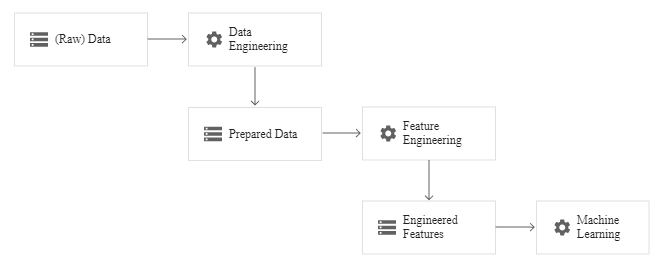

Lien: https://cloud.google.com/architecture/data-preprocessing-for-ml-with-tf-transform-pt1?hl=fr

In [3]:
data.shape # La méthode shape() permet de connaître le structure de notre DataFrame
           # on a 891 lignes et 12 colonnes.

(891, 12)

Plusieurs colonnes dans notre DataFrame ne vont pas servir car elles ne font pas de sens et ne servent a rien. Pour mieux comprendre qq je veux dire.....

In [4]:
# On supprime les colones qu'on n'utilise pas 
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Fare'],axis='columns',inplace=True)

In [5]:
data.info()

    # On a 1728 données dans chaque colonne.
    # Toutes les colonnes sont de type objet.
    # On n'a pas de données non nulles.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [6]:
data.isnull().sum() 

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [7]:
data.Sex = data.Sex.map({'male': 1, 'female': 2})

In [8]:
data.Age = data.Age.fillna(data.Age.mean())

In [9]:
data.head()

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,2,38.0
2,1,3,2,26.0
3,1,1,2,35.0
4,0,3,1,35.0


In [10]:
#Separation
Q1 = data.drop('Survived',axis='columns')
y = data.Survived
Q1.head()

,Pclass,Sex,Age
0,3,1,22.0
1,1,2,38.0
2,3,2,26.0
3,1,2,35.0
4,3,1,35.0


In [11]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<h3>Construire le Modèle d'arbre de décision</h3>


In [12]:
#Création jeu de train et de test

X_train, X_test, y_train, y_test = train_test_split(Q1,y,test_size=0.25)
modelTree = tree.DecisionTreeClassifier(random_state=0, criterion='gini',max_depth=6 )
modelTree.fit(X_train,y_train)
accuracyTreeReel = modelTree.score(X_test,y_test)
accuracyTreeTrain = modelTree.score(X_train,y_train)

print('Accuracy Arbre x_test: ', accuracyTreeReel)
print('Accuracy Arbre x_train: ', accuracyTreeTrain)



Accuracy Arbre x_test:  0.820627802690583
Accuracy Arbre x_train:  0.8413173652694611


<h3> On génére une image de notre arbre</h3>

In [13]:
dotfile = open("test.dot", 'w')
tree.export_graphviz(modelTree, out_file=dotfile, 
                      feature_names=['Pclass','Genre','Age'],  
                      class_names =['Mort','Vivant'],
                      filled=True, rounded=True,  
                      special_characters=True)  

dotfile.close()
system("dot -Tpng test.dot -o dtree2.png")

1

<img src='dtree2. png'>

<h3>Nouvelle prédiction</h3>

In [14]:
#Prédiction test
modelTree.predict([[2,2,30]])

array([1], dtype=int64)

In [15]:
# On verifie le nombre de fréquences des variables catégorielles.

col_nom = ["Pclass", 'Sex', 'Age']
for col in col_nom:
    
    print(data[col].value_counts()) 

3    491
1    216
2    184
Name: Pclass, dtype: int64
1    577
2    314
Name: Sex, dtype: int64
29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
53.000000      1
55.500000      1
0.920000       1
24.500000      1
70.500000      1
Name: Age, Length: 89, dtype: int64


In [16]:
X_test

,Pclass,Sex,Age
653,3,2,29.699118
439,2,1,31.000000
778,3,1,29.699118
740,1,1,29.699118
745,1,1,70.000000
...,...,...,...
515,1,1,47.000000
276,3,2,45.000000
744,3,1,31.000000
787,3,1,8.000000


# Random Forest

In [17]:
#Importer les librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [18]:
acc_scorer = make_scorer(accuracy_score)

In [19]:
# Afficher le dataset
q2 = pd.read_csv("titanic.csv")
q2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
q2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
q2.dropna(subset=['Age'],inplace=True)
#q2.Age = q2.Age.fillna(q2.Age.mean())
q2.Age = q2.Age.astype(int)
q2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [22]:
# Transformation de la variable Sex
q2.Sex = q2.Sex.map({'male': 0, 'female': 1})

In [23]:
q2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [24]:
q2['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
F2             3
              ..
A36            1
C91            1
T              1
E36            1
B38            1
Name: Cabin, Length: 134, dtype: int64

In [25]:
# Premier tri
q2.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns',inplace=True)

In [26]:
q2.describe()

# Environ 40% ont survecu et 60% sont morts

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.679272,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.536483,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, '%Survie')

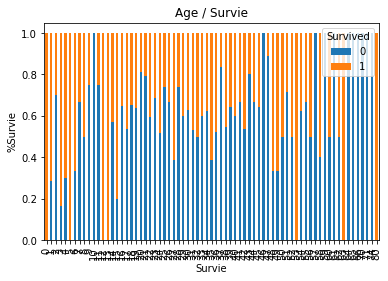

In [27]:
# Influence de l'âge sur la survie
import matplotlib.pyplot as plt
table= pd.crosstab(q2.Age,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Age / Survie')
plt.xlabel('Survie')
plt.ylabel('%Survie')

In [28]:
q2['AgeBand'] = pd.cut(q2['Age'], 5)
q2[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.370690
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [29]:
q2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,22,1,0,7.2500,S,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,"(32.0, 48.0]"


In [30]:
q2.loc[ q2['Age'] <= 16, 'Age'] = 0
q2.loc[(q2['Age'] > 16) & (q2['Age'] <= 32), 'Age'] = 1
q2.loc[(q2['Age'] > 32) & (q2['Age'] <= 48), 'Age'] = 2
q2.loc[(q2['Age'] > 48) & (q2['Age'] <= 64), 'Age'] = 3
q2.loc[ q2['Age'] > 64, 'Age'] =4
q2.drop(['AgeBand'],axis=1,inplace=True)

In [31]:
q2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,S
1,1,1,1,2,1,0,71.2833,C
2,1,3,1,1,0,0,7.9250,S
3,1,1,1,2,1,0,53.1000,S
4,0,3,0,2,0,0,8.0500,S


Text(0, 0.5, '%Survie')

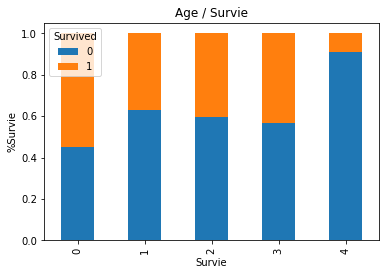

In [32]:
#Age
table= pd.crosstab(q2.Age,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Age / Survie')
plt.xlabel('Survie')
plt.ylabel('%Survie')

Text(0, 0.5, '')

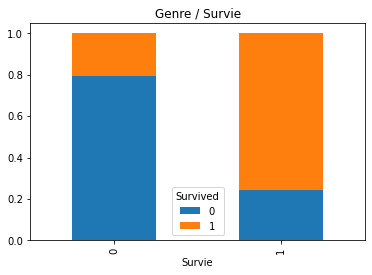

In [33]:
# Sexe
table= pd.crosstab(q2.Sex,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Genre / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

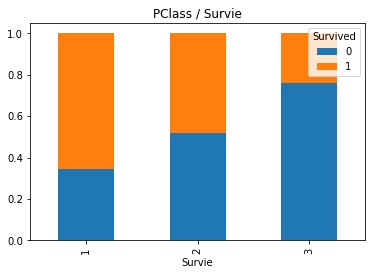

In [34]:
table= pd.crosstab(q2.Pclass,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('PClass / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

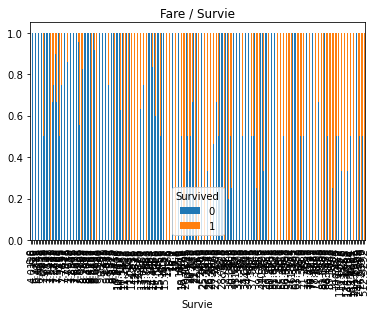

In [35]:
table= pd.crosstab(q2.Fare,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fare / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [36]:
q2['FareGroup'] = pd.qcut(q2['Fare'],3)
q2[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

,FareGroup,Survived
0,"(-0.001, 10.462]",0.196653
1,"(10.462, 26.55]",0.460581
2,"(26.55, 512.329]",0.564103


In [37]:
q2.loc[ q2['Fare'] <= 10.462, 'Fare'] = 0
q2.loc[(q2['Fare'] > 10.462) & (q2['Fare'] <= 26.55), 'Fare'] = 1
q2.loc[ q2['Fare'] > 26.55, 'Fare'] = 2
q2['Fare'] = q2['Fare'].astype(int)

q2.drop(['FareGroup'], axis=1,inplace=True)

Text(0, 0.5, '')

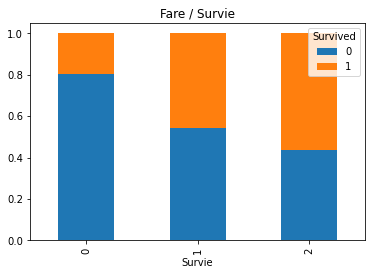

In [38]:
table= pd.crosstab(q2.Fare,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fare / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

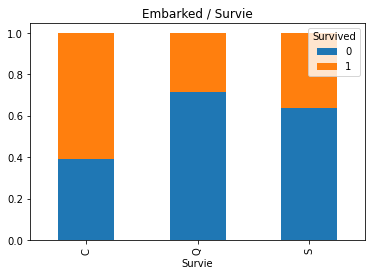

In [39]:
table= pd.crosstab(q2.Embarked,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Embarked / Survie')
plt.xlabel('Survie')
plt.ylabel('')

# La place ou on a embarqué n'a pas d'impact sur notre survie 

Text(0, 0.5, '')

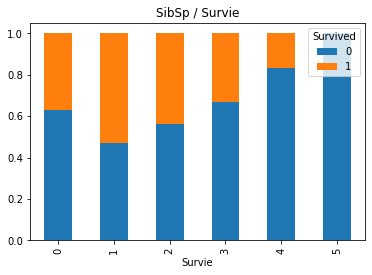

In [40]:
# Structure de la famille
table= pd.crosstab(q2.SibSp,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('SibSp / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

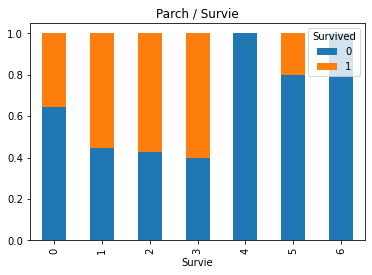

In [41]:
# Enfants
table= pd.crosstab(q2.Parch,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Parch / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [42]:
q2['FamilySize'] = q2['SibSp'] + q2['Parch'] + 1

Text(0, 0.5, '')

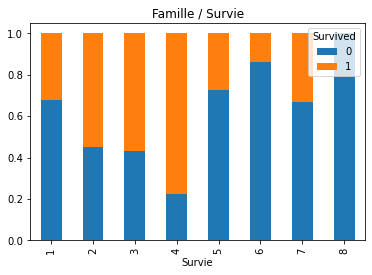

In [43]:
table= pd.crosstab(q2.FamilySize,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Famille / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [44]:
# Premier tri
q2.drop(['SibSp','Parch'],axis='columns',inplace=True)

In [45]:
#Separation
Features = q2.drop('Survived',axis='columns')
y = q2.Survived
Features.head()
Features.shape

(714, 6)

In [46]:
Features.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,1,0,S,2
1,1,1,2,2,C,2
2,3,1,1,0,S,1
3,1,1,2,2,S,2
4,3,0,2,0,S,1


In [47]:
# Ajustement des features
Features.tail()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
885,3,1,2,2,Q,6
886,2,0,1,1,S,1
887,1,1,1,2,S,1
889,1,0,1,2,C,1
890,3,0,1,0,Q,1


In [48]:
# Correlation positive
Features.drop(['Embarked','Pclass'],axis=1,inplace=True)

In [49]:
Features.head()

,Sex,Age,Fare,FamilySize
0,0,1,0,2
1,1,2,2,2
2,1,1,0,1
3,1,2,2,2
4,0,2,0,1


In [50]:
# Ajustement des features
Features.tail()

,Sex,Age,Fare,FamilySize
885,1,2,2,6
886,0,1,1,1
887,1,1,2,1
889,0,1,2,1
890,0,1,0,1


In [51]:
Features.head()

,Sex,Age,Fare,FamilySize
0,0,1,0,2
1,1,2,2,2
2,1,1,0,1
3,1,2,2,2
4,0,2,0,1


In [52]:
X_train, X_test, y_train, y_test = train_test_split(Features, y, test_size=0.3, random_state=0)

In [53]:
random_forest = RandomForestClassifier()

parameters = {'n_estimators': [3,4,5,10,15,20,25,30,35,40,45],'criterion': ['entropy'], 'max_depth': [2, 3, 5, 10]}

grid_obj = GridSearchCV(random_forest, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
print(grid_obj.best_estimator_)
# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(clf.score(Features,y))

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=20)
0.8336673346693386
0.8093023255813954
0.8263305322128851


In [54]:
random_forest = RandomForestClassifier()

parameters = {'n_estimators': [3,4,5,10,15,20,25,30,35,40,45],'criterion': ['gini'], 'max_depth': [2, 3, 5, 10]}

grid_obj = GridSearchCV(random_forest, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
print(grid_obj.best_estimator_)
# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(clf.score(Features,y))

RandomForestClassifier(max_depth=5, n_estimators=5)
0.8216432865731463
0.8186046511627907
0.8207282913165266


In [55]:
random_forest = RandomForestClassifier()

parameters = {'n_estimators': [100],'criterion': ['gini'], 'max_depth': [2, 3, 5, 10]}

grid_obj = GridSearchCV(random_forest, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
print(grid_obj.best_estimator_)
# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(clf.score(Features,y))

RandomForestClassifier(max_depth=5)
0.8356713426853707
0.8046511627906977
0.8263305322128851
